## **House Price Prediction**

## Loading the required libraries

In [15]:
import pandas as pd
import numpy as np

#Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Ignore warning
import warnings
warnings.filterwarnings('ignore')

### Loading the Housing dataset

In [16]:
data = pd.read_csv('Housing.csv')
data.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [17]:
data.tail(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


### Data inspection

In [18]:
data.shape

(545, 13)

That is, the data contains 545 rows and 13 columns.

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


Here 6 columns columns are integers and remaining 7 are object type.

In [20]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [21]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### Cleaning

In [22]:
#Check for null values
data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

No null values.

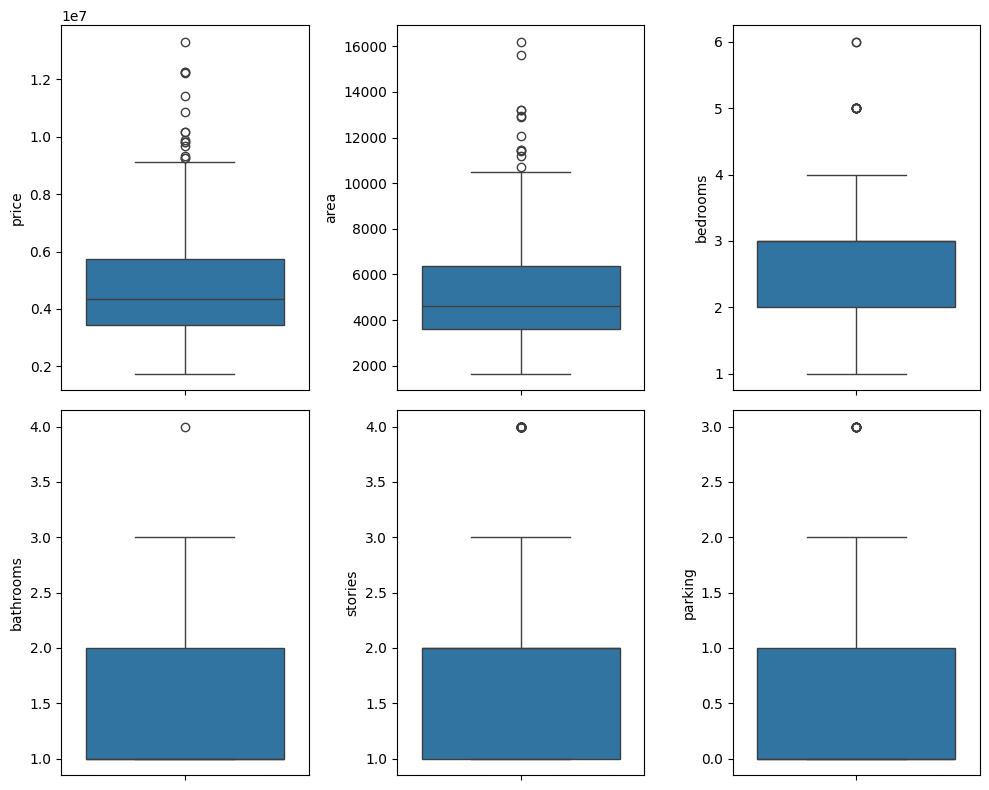

In [23]:
#Outlier detection
fig,axs = plt.subplots(2,3,figsize=(10,8))
plot1 = sns.boxplot(data['price'],ax=axs[0,0])
plot2 = sns.boxplot(data['area'],ax=axs[0,1])
plot3 = sns.boxplot(data['bedrooms'],ax=axs[0,2])
plot4 = sns.boxplot(data['bathrooms'],ax=axs[1,0])
plot5 = sns.boxplot(data['stories'],ax=axs[1,1])
plot6 = sns.boxplot(data['parking'],ax=axs[1,2])

plt.tight_layout()

It is clear that the price and area columns contains significant number of outliers.So we exclude them.

In [24]:
#Treating outliers

from scipy.stats import zscore
z_scr = (zscore(data[['price','area']]))
threshold = 3
outlier_mask = (abs(z_scr)>threshold).any(axis = 1)
new_data = data[~outlier_mask]

In [25]:
outlier_mask.sum()

13

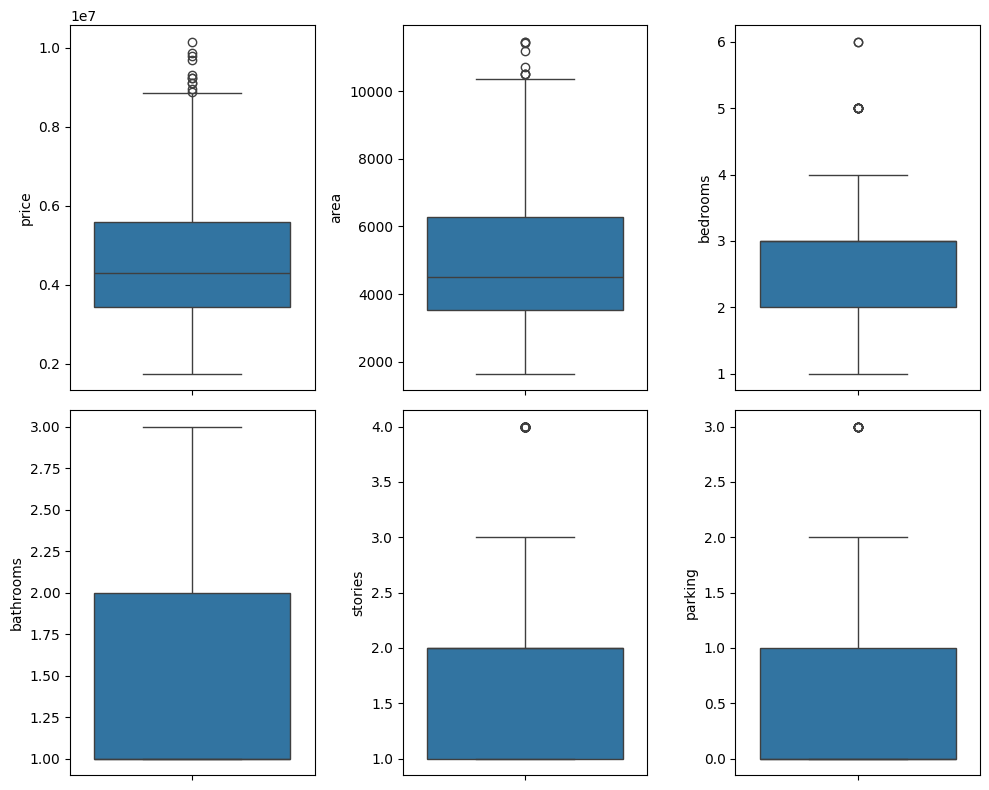

In [26]:
fig,axs = plt.subplots(2,3,figsize=(10,8))
plot1 = sns.boxplot(new_data['price'],ax=axs[0,0])
plot2 = sns.boxplot(new_data['area'],ax=axs[0,1])
plot3 = sns.boxplot(new_data['bedrooms'],ax=axs[0,2])
plot4 = sns.boxplot(new_data['bathrooms'],ax=axs[1,0])
plot5 = sns.boxplot(new_data['stories'],ax=axs[1,1])
plot6 = sns.boxplot(new_data['parking'],ax=axs[1,2])

plt.tight_layout()

Now we can see that the outliers have been removed.

In [27]:
new_data.shape

(532, 13)

### Exploratory Data Analysis

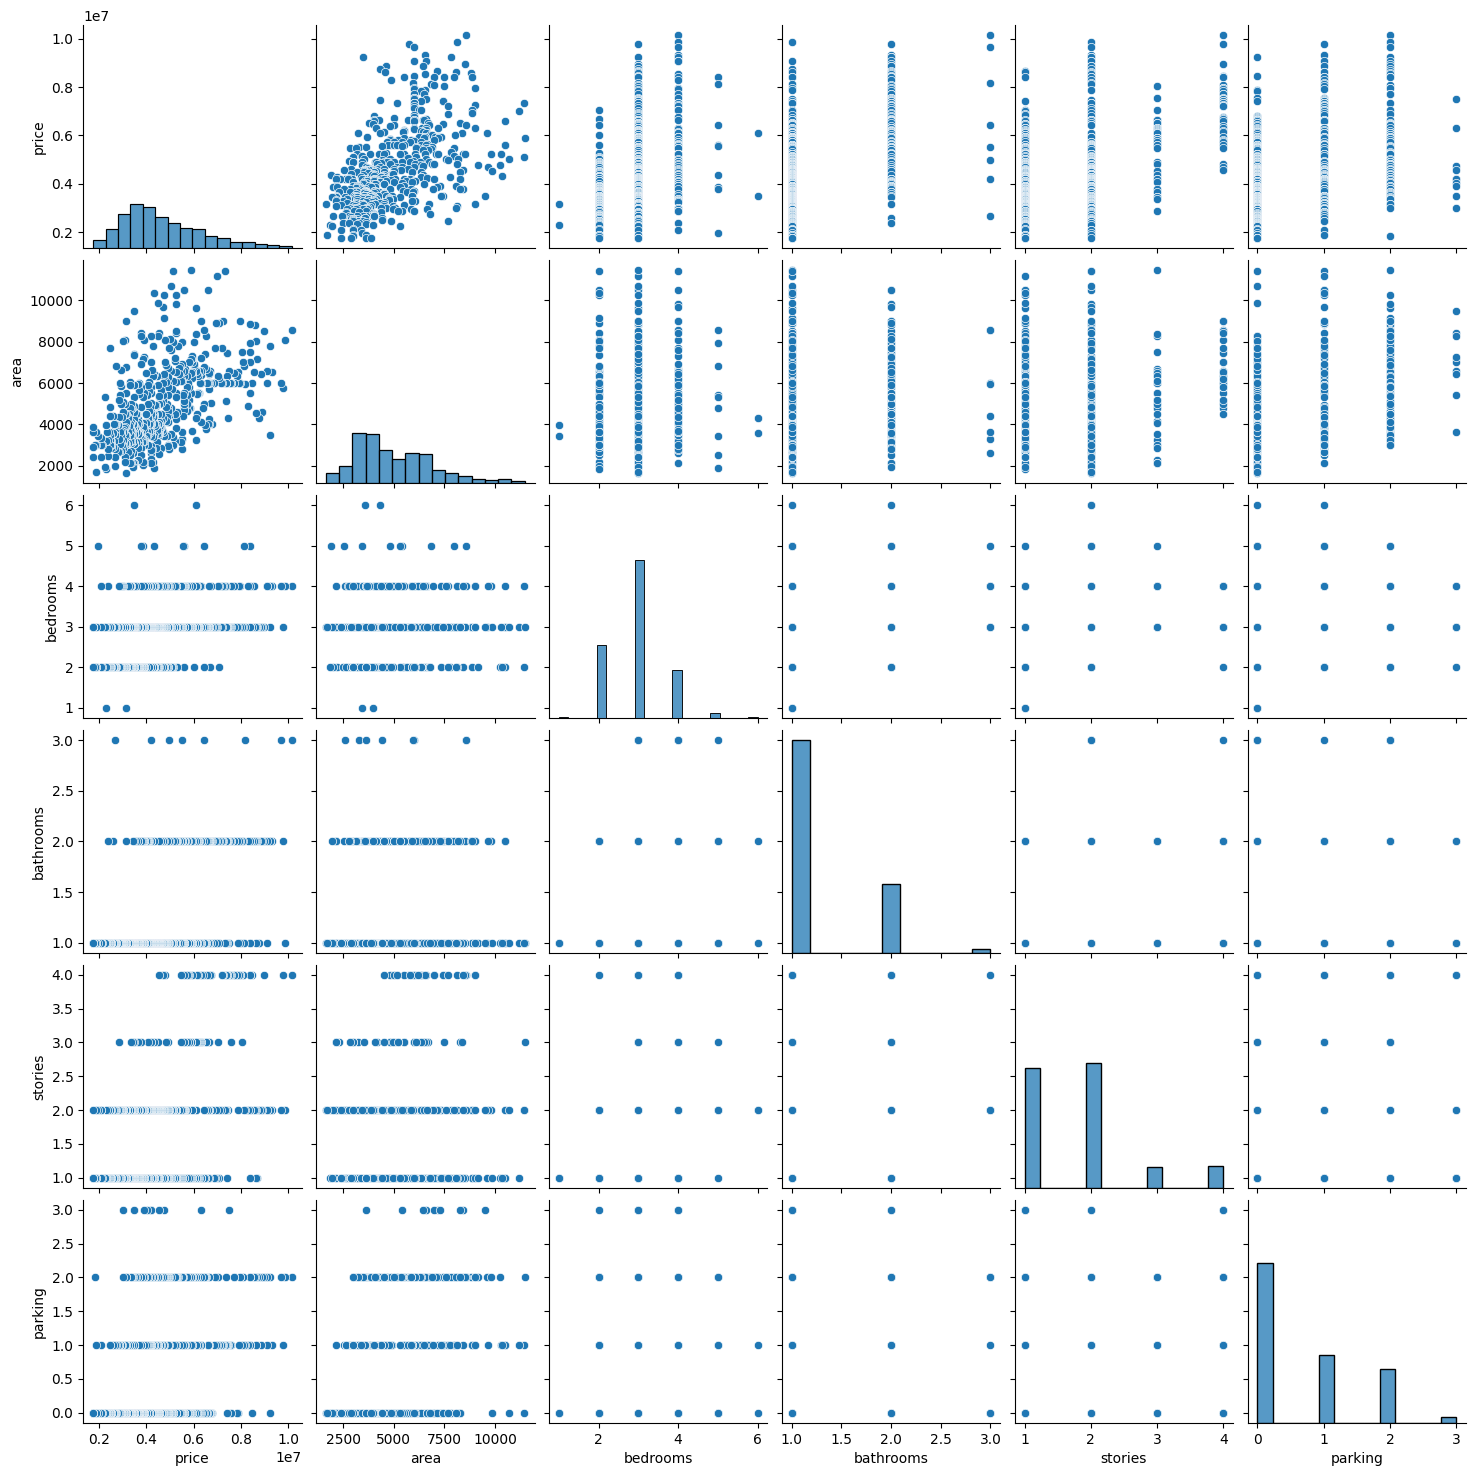

In [28]:
#pairplot
sns.pairplot(new_data)
plt.show()

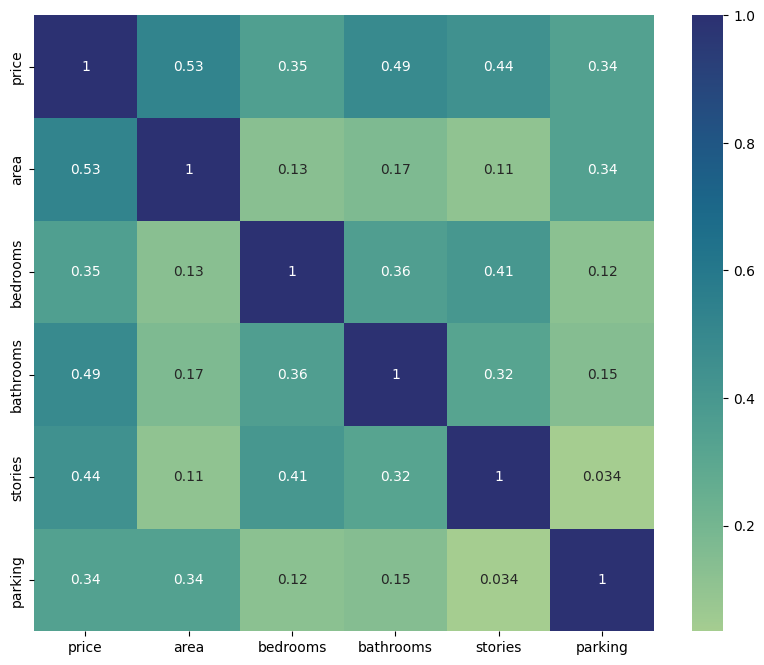

In [29]:
#correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(new_data.corr(),annot=True,cmap='crest')
plt.show()

This shows that 'area' is highly correlated with 'price'.

### Data Preprocessing

In [30]:
#Encoding the categorical variables

#Converting the Y/N columns to binary columns
cat_variables = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

def binary_col(col):
  return col.map({'yes':1,'no':0})

new_data[cat_variables] = new_data[cat_variables].apply(binary_col)
new_data.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,semi-furnished
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,furnished
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,unfurnished


In [31]:
#Encoding the ' furnishingstatus' column which contain 3 levels using 'get_dummies'
furnish_sts = pd.get_dummies(new_data['furnishingstatus'])
furnish_sts.head(3)

,furnished,semi-furnished,unfurnished
6,0,1,0
8,1,0,0
9,0,0,1


In [32]:
#Dropping the 'furnishingstatus' column and combining the 'furnish_sts' column instead

new_data = new_data.drop(['furnishingstatus'],axis = 1)
new_data = pd.concat([new_data,furnish_sts],axis = 1)
new_data.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,0,1,0
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,1,0,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,0,0,1


In [33]:
#Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#We scale the features other than the encoded ones
to_be_scaled = ['price','area','bedrooms','bathrooms','stories','parking']
new_data[to_be_scaled] = scaler.fit_transform(new_data[to_be_scaled])
new_data.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
6,1.000000,0.706422,0.6,1.0,1.000000,1,0,0,0,1,0.666667,1,0,1,0
8,0.966667,0.657492,0.6,0.0,0.333333,1,1,1,0,1,0.666667,1,1,0,0
9,0.958333,0.417941,0.4,0.5,1.000000,1,1,0,0,1,0.333333,1,0,0,1


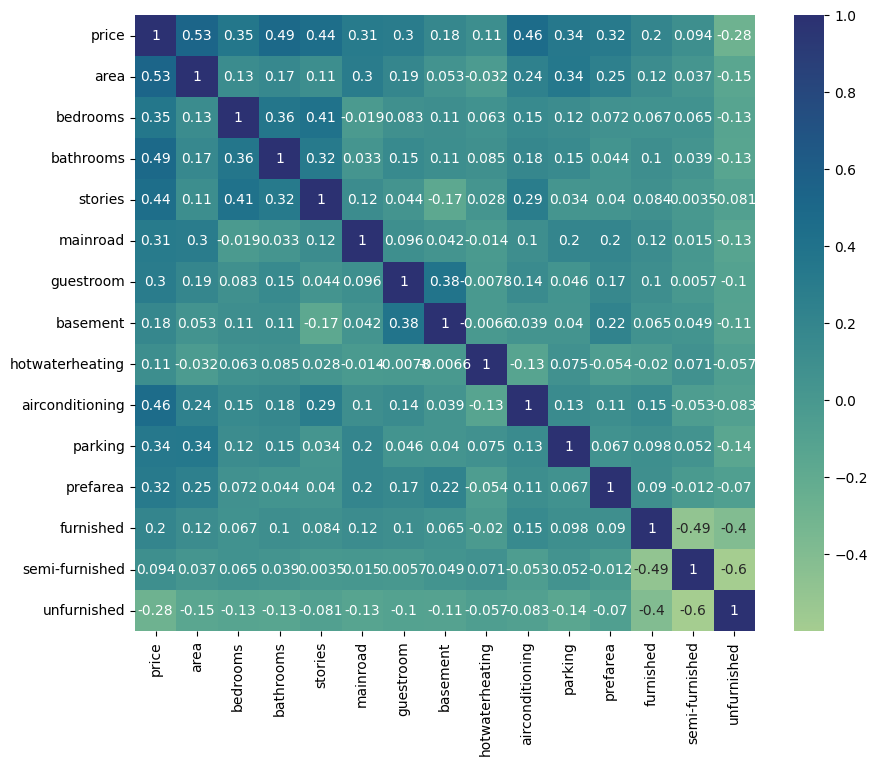

In [34]:
#Correlation matrix to know the feature relationships
plt.figure(figsize=(10,8))
sns.heatmap(new_data.corr(),annot = True,cmap = 'crest')
plt.show()

The variables 'area','bathrooms','airconditioning','stories' have positive relationship with 'price' and while 'unfurnished' has a negative  relationship.

### Creating the feature and target variables

In [35]:
X = new_data.drop(['price'],axis = 1)#feature
y = new_data['price']#target

X = np.array(X)
y = np.array(y)

y = y.reshape(-1,1)

print(X.shape)
print(y.shape)

(532, 14)
(532, 1)


### Creating the training and testing data set

In [37]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42,shuffle=True)

## Initialising the Linear Regression Model,Feature selection and Prediction

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

#selecting the number of features to be selected
parameters = {'n_features_to_select':[3,5,7,10]}

#Initializing the model
model = LinearRegression()

rfe = RFE(model)
grid = GridSearchCV(estimator=rfe,param_grid=parameters,scoring='neg_mean_squared_error',cv=5)
grid.fit(X_train,y_train)

best_features = grid.best_estimator_.n_features_to_select
print('Number of features to select:',best_features)

Number of features to select: 10


In [41]:
#Feature selection
rfe = RFE(model,n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train,y_train)
X_test_rfe = rfe.transform(X_test)

In [42]:

#Fitting the model
lm = model.fit(X_train_rfe,y_train)

#Prediction
y_pred = lm.predict(X_test_rfe)

### Performance Evaluation

In [43]:
from sklearn.metrics import mean_squared_error,r2_score

mse = mean_squared_error(y_test,y_pred)
print('Mean Squared Error :',mse)

r2score = r2_score(y_test,y_pred)
print('R-Squared :',r2score)

Mean Squared Error : 0.013681722495371163
R-Squared : 0.7201739613624065


### **Inference**


*   Here, our model has a low MSE(0.013681722495371163) and lower MSE indicates that the model has a better performance .Almost all values are correctly predicted.
*   Also,R-Squared value is 0.7201739613624065, between 0 and 1 ,implies that the model explains 72% of variability in target variable and remaining is unexplained.

### Predicted vs. Actual Plot

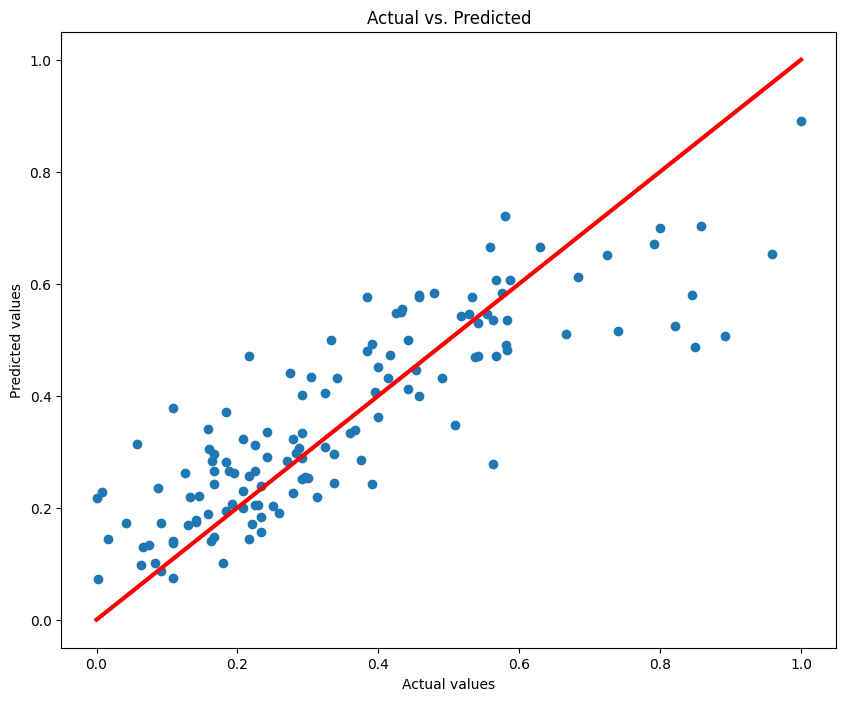

In [44]:
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],linewidth = 3,color='red')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted')
plt.show()

This plot shows that our model almost correctly predicted y values.